## 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

- 데이터 탐색

In [1]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

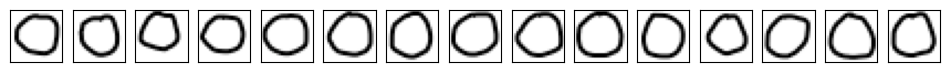

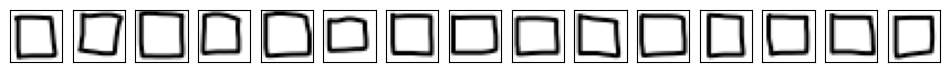

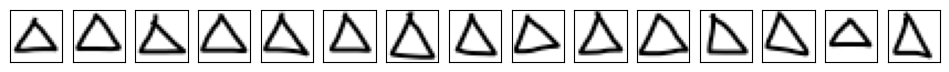

In [2]:
# Train dataset
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'data/hard_handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

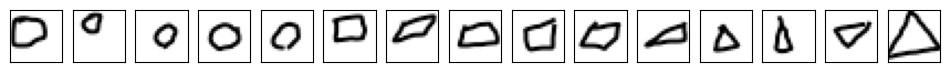

In [3]:
# Test dataset
shapes = ['circle', 'rectangle', 'triangle']
plt.figure(figsize=(12,1))
for k, shape in enumerate(shapes):
    dir_name = f'data/hard_handwriting_shape/test/{shape}'
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,k*5+i+1)
        plt.imshow(img)
        plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
import cv2
cv2.imread('data/hard_handwriting_shape/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

- 데이터셋 생성하기

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'data/hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [6]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [7]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'data/hard_handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [8]:
test_data_generator.filenames[0]

'circle\\circle021.png'

- 모델 정의/설정/학습/평가

In [9]:
import numpy as np
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [11]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [12]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [13]:
model.fit(
    train_data_generator,
    epochs=300, verbose=0,
    validation_data=test_data_generator,
    steps_per_epoch=15,         # 총 데이터 수(45) / batch_size(3) = 15
    validation_steps=5          # 총 데이터 수(15) / batch_size(3) = 5
)

In [14]:
model.evaluate(test_data_generator)

1/5 [=====>........................] - ETA: 0s - loss: 10.4268 - accuracy: 0.3333

5/5 [==============================] - 0s 8ms/step - loss: 8.1712 - accuracy: 0.4000


[8.171191215515137, 0.4000000059604645]